In [16]:
import torchaudio
import torch
import matplotlib.pyplot as plt
import numpy as np

## 主程序

In [17]:
FILENAME = "split1_ir1_ov1_24.wav"
waveform, sample_freq = torchaudio.load(FILENAME)
# maxv = torch.max(abs(waveform))
# waveform = waveform/maxv
win_size = 1024
win_shift = 512
m, n = waveform.shape

In [18]:
# padding to 2^k
if (n-win_size)%win_shift != 0:
    waveform = torch.cat([waveform,torch.zeros(m,win_shift-(n-win_size)%win_shift)],dim=1)
    n = waveform.shape[1]

In [19]:
# split frames into rows
frame_num = (n-win_size)//win_shift + 1
strided_input = waveform.as_strided((m,frame_num,win_size),(n,win_shift,1))
strided_input = strided_input - torch.mean(strided_input,dim=2).unsqueeze(2)

In [20]:
 # pre-emphasis
# print(strided_input.shape)
# preemphasis = 0.97
# offset_strided_input = torch.nn.functional.pad(
#         strided_input, (1, 0), mode='replicate')
# print(offset_strided_input.shape)
# strided_input = strided_input - preemphasis*offset_strided_input[:,:,:-1]

In [21]:
# windowed and FFT
win_func = torch.hamming_window(win_size,periodic=False)
windowed_input = strided_input * win_func
fft = torch.rfft(windowed_input,1,normalized=False, onesided=True)*2/win_size
fft[:,:,0] = fft[:,:,0]/2
power_spectrum = fft.pow(2).sum(3)
print(power_spectrum.shape)

torch.Size([4, 5521, 513])


## 测试区

In [22]:
y = waveform[0]

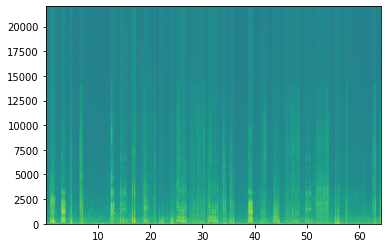

In [23]:
spectrum,freqs,bins,im = plt.specgram(y,Fs=44100,window=np.hamming(1024),NFFT=1024,noverlap=512,scale_by_freq=True)

In [24]:
np.max(spectrum)

1.0298745728745633e-05

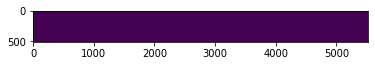

In [25]:
plt.imshow(power_spectrum[0].T)

In [26]:
tmp = np.log10(power_spectrum)*10
tmp = tmp[0]

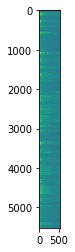

In [30]:

plt.imshow(tmp)

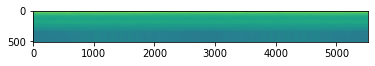